In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Uber Request Data.csv")

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [8]:
df.describe(include = "all")

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [9]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [10]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [11]:
#remove the 2 columns which no need for the analysis
df.drop(columns = ["Driver id", "Drop timestamp"], axis =1, inplace = True)

In [12]:
df.head(3)

,Request id,Pickup point,Status,Request timestamp
0,619,Airport,Trip Completed,11/7/2016 11:51
1,867,Airport,Trip Completed,11/7/2016 17:57
2,1807,City,Trip Completed,12/7/2016 9:17


In [16]:
df.iloc[30:50][['Request timestamp' ]]

,Request timestamp
30,12/7/2016 9:27
31,12/7/2016 16:09
32,13-07-2016 05:34:20
33,13-07-2016 19:57:59
34,14-07-2016 02:17:35
35,14-07-2016 13:01:10
36,15-07-2016 08:30:06
37,15-07-2016 15:01:20
38,11/7/2016 7:27
39,11/7/2016 11:03


In [17]:
#Replaced '/' with '-' for consistency
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: str(x).replace('/','-'))

In [18]:
df.iloc[30:50][['Request timestamp' ]]

,Request timestamp
30,12-7-2016 9:27
31,12-7-2016 16:09
32,13-07-2016 05:34:20
33,13-07-2016 19:57:59
34,14-07-2016 02:17:35
35,14-07-2016 13:01:10
36,15-07-2016 08:30:06
37,15-07-2016 15:01:20
38,11-7-2016 7:27
39,11-7-2016 11:03


In [24]:
#insert :00 where the second missing

df['Request timestamp'] = df['Request timestamp'].apply(lambda x: str(x) + ':00' if str(x).count(':') == 1 else str(x))


In [23]:
df.iloc[30:50][['Request timestamp' ]]

,Request timestamp
30,12-7-2016 9:27:00
31,12-7-2016 16:09:00
32,13-07-2016 05:34:20
33,13-07-2016 19:57:59
34,14-07-2016 02:17:35
35,14-07-2016 13:01:10
36,15-07-2016 08:30:06
37,15-07-2016 15:01:20
38,11-7-2016 7:27:00
39,11-7-2016 11:03:00


In [26]:
from datetime import datetime
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: datetime.strptime(str(x), "%d-%m-%Y %H:%M:%S"))

In [27]:
df.head(3)

,Request id,Pickup point,Status,Request timestamp
0,619,Airport,Trip Completed,2016-07-11 11:51:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00
2,1807,City,Trip Completed,2016-07-12 09:17:00


In [28]:
df.dtypes

Request id                    int64
Pickup point                 object
Status                       object
Request timestamp    datetime64[ns]
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 210.9+ KB


In [30]:
df['Hour'] = df['Request timestamp'].dt.hour

In [34]:
df['Day'] = df['Request timestamp'].dt.day_name()

In [35]:
df.head(3)

,Request id,Pickup point,Status,Request timestamp,Hour,Day
0,619,Airport,Trip Completed,2016-07-11 11:51:00,11,Monday
1,867,Airport,Trip Completed,2016-07-11 17:57:00,17,Monday
2,1807,City,Trip Completed,2016-07-12 09:17:00,9,Tuesday


In [36]:
def cal_time(x):
    if x <=5 :
        return 'Early Morning'
    elif x>5 and x< 12:
        return 'Morning'
    elif x>= 12 and x < 15:
        return 'Aftrnoon'
    elif x >= 15 and x < 18:
        return 'Evening'
    elif x >= 18 and x <21:
        return 'Night'
    else:
        return 'Late Night'

df['Time Slot'] = df['Hour'].apply(cal_time)

In [37]:
df.head(12)

,Request id,Pickup point,Status,Request timestamp,Hour,Day,Time Slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,11,Monday,Morning
1,867,Airport,Trip Completed,2016-07-11 17:57:00,17,Monday,Evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,9,Tuesday,Morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,21,Tuesday,Late Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,8,Wednesday,Morning
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,21,Wednesday,Late Night
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,6,Thursday,Morning
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,5,Friday,Early Morning
8,6248,City,Trip Completed,2016-07-15 17:57:27,17,Friday,Evening
9,267,City,Trip Completed,2016-07-11 06:46:00,6,Monday,Morning


In [38]:
df.to_csv("Uber Request Data Cleaned Modified.csv")

In [42]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

# Percentage of the Order Status

In [53]:
status_counts = df['Status'].value_counts()

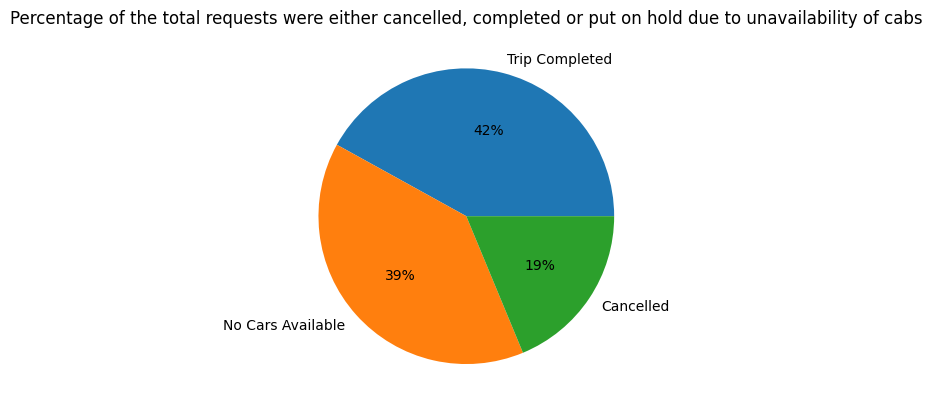

In [88]:
plt.pie(status_counts.values,
       labels = status_counts.index,
       autopct = '%.0f%%'
       )
plt.title("Percentage of the total requests were either cancelled, completed or put on hold due to unavailability of cabs")
plt.show()

# Frequency of Status at Pickup Points

In [43]:
df['Pickup point'].value_counts()

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

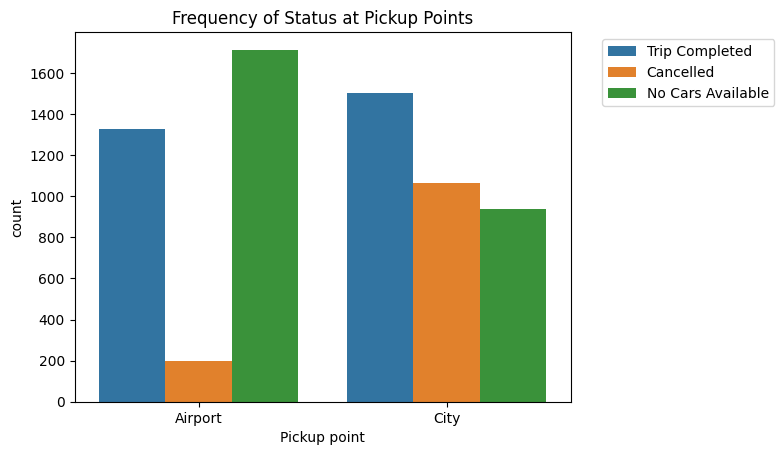

In [90]:
sns.countplot(x="Pickup point", hue="Status", data=df)
plt.title("Frequency of Status at Pickup Points")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Peak number of request on a particular day (in percentage)

In [60]:
days_count = df['Day'].value_counts()
days_count

Day
Friday       1381
Monday       1367
Thursday     1353
Wednesday    1337
Tuesday      1307
Name: count, dtype: int64

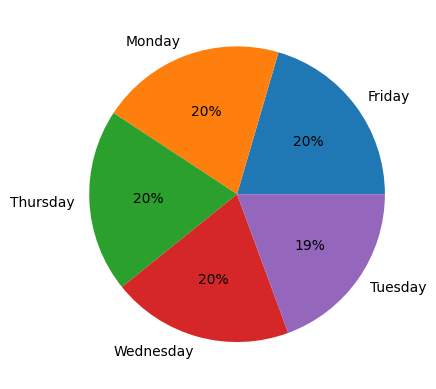

In [61]:
plt.pie(days_count.values,
       labels = days_count.index,
       autopct = '%.0f%%'
       )

plt.show()

# Peak number of request on a particular day (in value count)

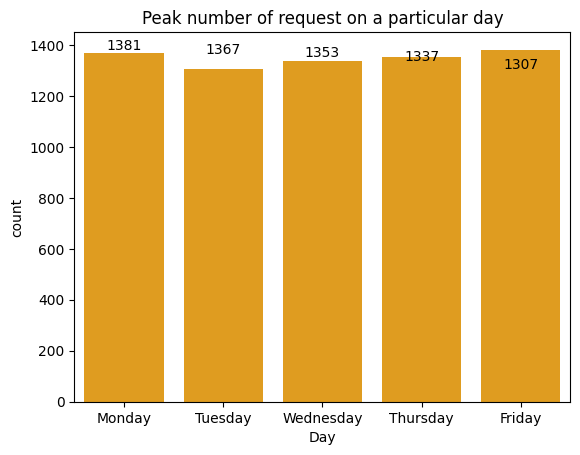

In [65]:
sns.countplot(x="Day", data=df, color = "orange")
plt.title("Peak number of request on a particular day")
# Add labels for the bars
for i, v in enumerate(days_count.values):
    plt.text(i, v, str(v), ha='center')
plt.show()

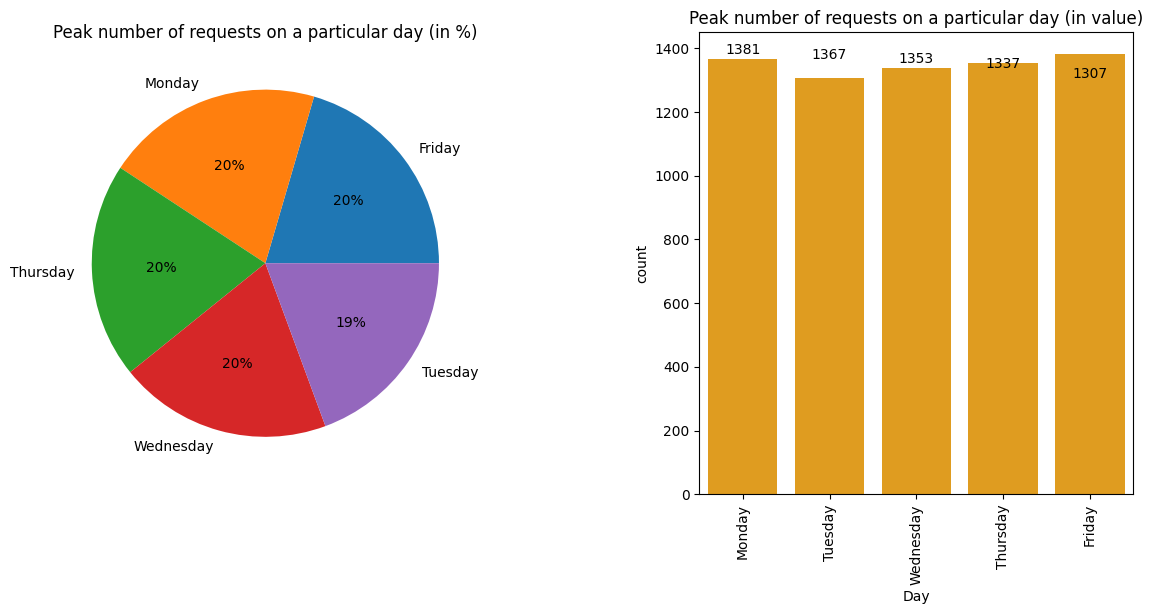

In [74]:
fig, axes = plt.subplots(1,2, figsize = (14, 6))
plt.subplots_adjust(hspace = 0.5, wspace= 0.5)

# Pie chart
axes[0].pie(days_count.values, labels=days_count.index, autopct='%.0f%%')
axes[0].set_title('Peak number of requests on a particular day (in %)')

# Count plot chart
sns.countplot(x="Day", data=df, color="orange", ax=axes[1])
axes[1].set_title("Peak number of requests on a particular day (in value)")

# Add labels for the bars in count plot chart
for i, v in enumerate(days_count.values):
    axes[1].text(i, v, str(v), ha='center')

plt.xticks(rotation = 90)
plt.show()

## Insights:¶
The peak number of requests on a particular day are as follows:

Friday with 1381 request

Monday  with 1367 request

Thursday with 1353 request

Wednesday with 1337 request

Tuesday  with 1307 request

In [59]:
df.loc[df['Day'] == 'Monday']

,Request id,Pickup point,Status,Request timestamp,Hour,Day,Time Slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,11,Monday,Morning
1,867,Airport,Trip Completed,2016-07-11 17:57:00,17,Monday,Evening
9,267,City,Trip Completed,2016-07-11 06:46:00,6,Monday,Morning
18,535,Airport,Trip Completed,2016-07-11 10:00:00,10,Monday,Morning
19,960,Airport,Trip Completed,2016-07-11 18:45:00,18,Monday,Night
...,...,...,...,...,...,...,...
4594,1355,Airport,No Cars Available,2016-07-11 23:45:00,23,Monday,Late Night
4595,1352,Airport,No Cars Available,2016-07-11 23:49:00,23,Monday,Late Night
4596,1357,City,No Cars Available,2016-07-11 23:52:00,23,Monday,Late Night
4597,1358,City,No Cars Available,2016-07-11 23:57:00,23,Monday,Late Night


In [75]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [77]:
df_cancel = df[df['Status'] == "Cancelled"]
df_no_car_ava = df[df['Status'] == "No Cars Available"]

In [78]:
cancel_counts = df_cancel['Day'].value_counts()
no_car_ava_counts = df_no_car_ava['Day'].value_counts()

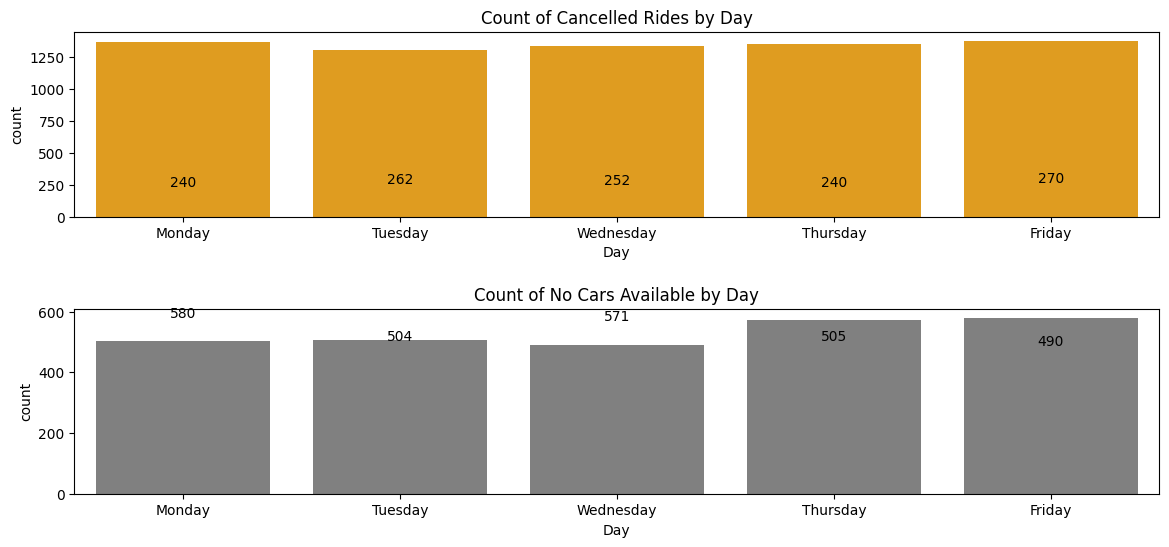

In [82]:
fig, axes = plt.subplots(2,1, figsize = (14, 6))
plt.subplots_adjust(hspace = 0.5, wspace= 0.5)

sns.countplot(x="Day", data=df, color="orange", ax=axes[0])
axes[0].set_title("Count of Cancelled Rides by Day")
for i, v in enumerate(df_cancel['Day'].value_counts().sort_index().values):
    axes[0].text(i, v, str(v), ha='center')

sns.countplot(x="Day", data=df_no_car_ava, color="grey", ax=axes[1])
axes[1].set_title("Count of No Cars Available by Day")
for i, v in enumerate(df_no_car_ava['Day'].value_counts().sort_index().values):
    axes[1].text(i, v, str(v), ha='center')

plt.show()

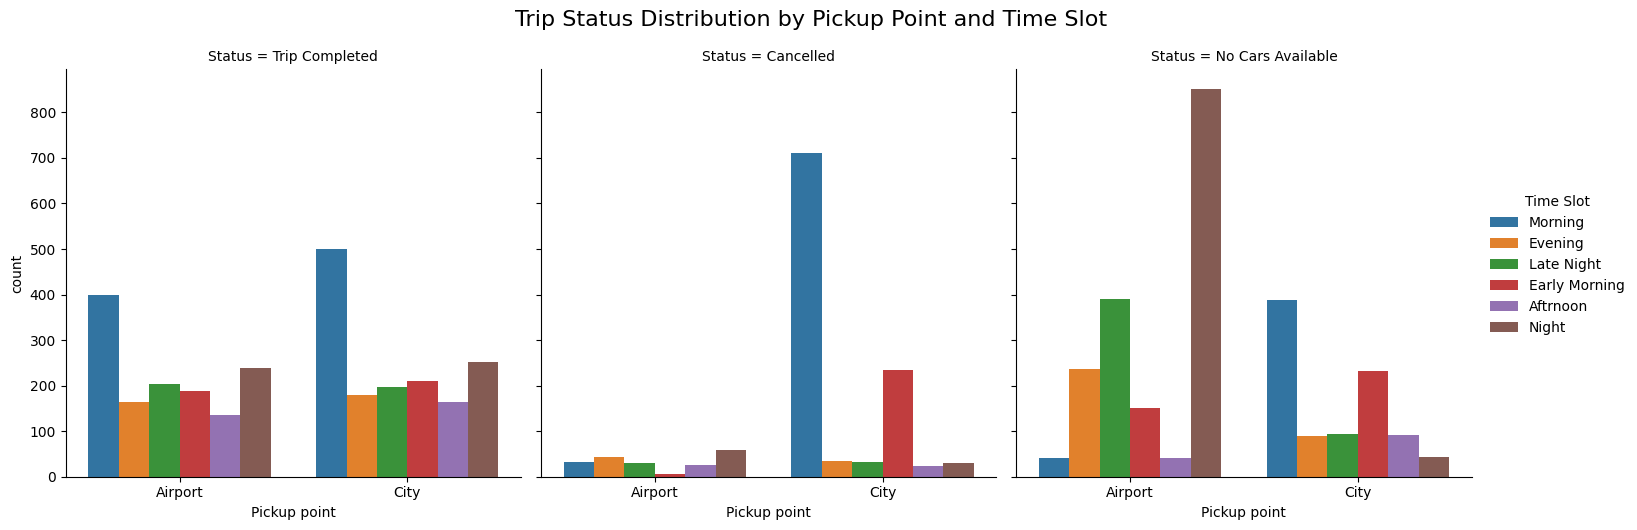

In [92]:
g = sns.catplot(x='Pickup point', col='Status', hue='Time Slot', data=df, kind='count')
# Set the title using suptitle to prevent overlap and center it
g.fig.suptitle("Trip Status Distribution by Pickup Point and Time Slot", fontsize=16, y=1.05)
plt.show()